# CRISP-DM Methodology

In this section we overview our selected method for engineering our solution. CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is an open standard guide that describes common approaches that are used by data mining experts. CRISP-DM includes descriptions of the typical phases of a project, including tasks details and provides an overview of the data mining lifecycle. The lifecycle model consists of six phases with arrows indicating the most important and frequent dependencies between phases. The sequence of the phases is not strict. In fact, most projects move back and forth between phases as necessary. It starts with business understanding, and then moves to data understanding, data preparation, modelling, evaluation, and deployment. The CRISP-DM model is flexible and can be customized easily.
## Buissness Understanding

    Tasks:

        1.Determine business objectives

        2.Assess situation

        3.Determine data mining goals

        4.Produce project plan

## Data Understanding
     Tasks:

    1.Collect data

    2.Describe data

    3.Explore data    

## Data Preparation
    Tasks
    1.Data selection

    2.Data preprocessing

    3.Feature engineering

    4.Dimensionality reduction

            Steps:

            Data cleaning

            Data integration

            Data sampling

            Data dimensionality reduction

            Data formatting

            Data transformation

            Scaling

            Aggregation

            Decomposition

## Data Modeling :

Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

    Tasks
    1. Select modeling technique Select technique

    2. Generate test design

    3. Build model

    4. Assess model

## Data Evaluation :
    Tasks

    1.Evaluate Result

    2.Review Process

    3.Determine next steps


#  Buissness Understanding
## Step 1: Import helpful libraries

In [ ]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
from catboost import CatBoostRegressor
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
#import smong 
from sklearn.linear_model import LinearRegression, RidgeCV
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')


## Step 2: Load the data

Next, we'll load the training and test data.

We set index_col=0 in the code cell below to use the id column to index the DataFrame. (If you're not sure how this works, try temporarily removing index_col=0 and see how it changes the result.)


In [ ]:
# import lux
# Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv")
test = pd.read_csv("../input/30-days-of-ml/test.csv")
# Preview the data
train.head()

## EDA 

### Explore the data

    Null Data
    Categorical data
    Itrain.isnull().sum().valuess there Text data
    wich columns will we use
    IS there outliers that can destory our algo
    IS there diffrent range of data
    Curse of dimm...

####  Null Data 

In [ ]:
train.isnull().sum().values

### Duplicates 

In [ ]:
train.duplicated(subset='id', keep='first').sum()

In [ ]:
len(train)-len(train.drop_duplicates())

In [ ]:
#Looking unique values
l=dict(train.nunique())
print(l)

In [ ]:
train.skew()

In [ ]:
# Check the structure of the data
print(train.info())

###  Stat

In [ ]:
train.describe()

# Convert Dtypes : 

In [ ]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

### Visual Exploratory 

In [ ]:
# Comparing the datasets length
fig, ax = plt.subplots(figsize=(5, 5))
pie = ax.pie([len(train), len(test)],
             labels=["Train dataset", "Test dataset"],
             colors=["salmon", "teal"],
             textprops={"fontsize": 15},
             autopct='%1.1f%%')
ax.axis("equal")
ax.set_title("Dataset length comparison", fontsize=18)
fig.set_facecolor('white')
plt.show

### Num/Cat Features 

In [ ]:
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

### Numerical features distribution
#### Histograms of numerical features

In [ ]:
# Numerical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(7, 2,figsize=(20, 24))
for feature in num_columns:
    plt.subplot(7, 2,i)
    sns.histplot(train[feature],color="blue", kde=True,bins=100, label='train')
    sns.histplot(test[feature],color="olive", kde=True,bins=100, label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

**Histograms of numerical data show a desperation of values with what look like multinomial distributions, also column cont1 seems to have some areas where the distribution becomes kinda discrete and again test numerical data seems to be similar to train numerical data.**
### Zooming on the correlation between numerical variables and target.

In [ ]:
train.corr()['target'][:-1].plot.barh(figsize=(8,6),alpha=.6,color='darkblue')
plt.xlim(-.075,.075);
plt.xticks([-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065],
           [str(100*i)+'%' for i in [-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065]],fontsize=12)
plt.title('Correlation between target and numerical variables',fontsize=14);

It's clear tat there isn't any clear relation between numerical variables and target.

Now Exploring correlation between all numerical variables. First we get a correlation grid of all numercial variables and target


### Correlation 

In [ ]:
train.corr().style.background_gradient(cmap='viridis')

### Box plot of numerical columns

In [ ]:
v0 = sns.color_palette(palette='viridis').as_hex()[0]
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=train[num_columns], color=v0,saturation=.5);
plt.xticks(fontsize= 14)
plt.title('Box plot of train numerical columns', fontsize=16);


### Test data 

In [ ]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=test[num_columns], color=v0,saturation=.5);
plt.xticks(fontsize= 14)
plt.title('Box plot of test numerical columns', fontsize=16);

Numerical Data seems to be kinda normalized with few outliers appearing in the box plot Also test numerical data seems to looks like the train ones.

## Categorical features distribution

### Number of categorical unique values

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.barplot(y=train[cat_columns].nunique().values, x=train[cat_columns].nunique().index, color='blue', alpha=.5)
plt.xticks(rotation=0)
plt.title('Number of categorical unique values',fontsize=16);

Most of columns seems to have few categorical unique values except cat9 column.

### Categorical features distribution

In [ ]:
labels = train['cat7'].astype('category').cat.categories.tolist()
counts = train['cat7'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [ ]:
# Categorical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(5, 2,figsize=(28, 44))
for feature in cat_columns:
    plt.subplot(5, 2,i)
    sns.histplot(train[feature],color="blue", label='train')
    sns.histplot(test[feature],color="olive", label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.violinplot(data = train, y = 'target', x = 'cat'+str(n),ax=ax, alpha =.7, fill=True,palette='viridis')
        ax.set_title('cat'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('Violin plot of target with categorical features', fontsize=16,y=.93);

###  KDE plot of target with categorical features 

In [ ]:
fig = plt.figure(figsize=(26,10))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.kdeplot(data = train, x = 'target', hue = 'cat'+str(n),ax=ax, alpha =.7, fill=False)
        ax.set_title('cat'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('KDE plot of train target with categorical features', fontsize=16,y=.93);

This plot kinda agrees with previous one but it looks like the KDE of some categorical values are pretty much flat compared to other value.

## Convert Dtypes :

In [ ]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

##  Target 
###  exploring target data main statistics

In [ ]:
train['target'].describe()

In [ ]:
train['target'].describe().iloc[1:].plot.barh(color=v0,alpha=.5,figsize=(12,5))
plt.title('Target data statistics',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0,10.8,.5));

### Distribution of Target

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

f.suptitle('Target', fontsize=16)
g = sns.kdeplot(train['target'], shade=True, label="%.2f"%(train['target'].skew()), ax=axes[0])
g = g.legend(loc="best")
stats.probplot(train['target'], plot=axes[1])
sns.boxplot(x='target', data=train, orient='h', ax=axes[2]);

plt.tight_layout()
plt.show()

In [ ]:
n, bins, patches = plt.hist(x=train['target'], bins='auto', color='blue',alpha=0.7, rwidth=0.5)
plt.xlabel("target")
plt.show()

### Box plot of target data with percentile of .1% and 99.9%

In [ ]:
y=train['target']
plt.figure(figsize=(12,6))
sns.boxplot(x=y, width=.4);
plt.axvline(np.percentile(y,.1), label='.1%', c='orange', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,.5), label='.5%', c='darkblue', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,1), label='1%', c='green', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,99.9), label='99.9%', c='blue', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,99), label='99%', c='gold', linestyle=':', linewidth=3)
plt.legend()
plt.title('Box plot of target data', fontsize=16)
plt.xticks(np.arange(0,10.8,.5));

### Bin target 

In [ ]:
bins = [0.140329,7.742071,  8.728634, 10.411992]
# Bin labels
labels1 = [ 'Low', 'Medium', 'High']
trainessai=train.copy()
# Bin the continuous variable ConvertedSalary using these boundaries
trainessai['target_binned'] = pd.cut(trainessai['target'], 
                                bins=bins,labels=labels1 )

In [ ]:
labels = trainessai['target_binned'].astype('category').cat.categories.tolist()
counts = trainessai['target_binned'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

## t-SNE visualization of high-dimensional data

t-SNE intuition t-SNE is super powerful, but do you know exactly when to use it? When you want to visually explore the patterns in a high dimensional dataset. press


In [ ]:
m = TSNE(learning_rate=50)
df_numeric =trainessai.drop(['id','target'], axis=1).iloc[:3000,:]._get_numeric_data()
df_numeric=df_numeric.dropna()
# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
%timeit 
print(tsne_features.shape)

In [ ]:
dataa=trainessai.drop(['id','target'], axis=1).iloc[:3000,:]
dataa['x']=tsne_features[:, 0]
dataa['y']=tsne_features[:, 1]
# Color the points according to Army Component
sns.scatterplot(x='x', y='y', hue='target_binned', data=dataa)
# Show the plot
plt.show()

**Target is really so disperssed**
## PCA 

In [ ]:
numdata=train[num_columns].copy()
clus = KMeans(n_clusters=5, max_iter=2000)
kmean_no_pca= clus.fit_predict(numdata)
train1=train.copy()
train1['cluster'] = kmean_no_pca
train1['cluster'] = train1['cluster'].astype('object')

In [ ]:
train1.head(3)

In [ ]:
fig = plt.figure(figsize=(18,26))#,constrained_layout=True)
grid =  gridspec.GridSpec(7, 2, figure= fig, hspace= .2, wspace= .05)
n =0
for i in range(7):
    for j in range(2):
        ax = fig.add_subplot(grid[i, j])
        sns.scatterplot(data=train1, y='target', x='cont'+str(n), hue= 'cluster', ax=ax, palette='viridis', alpha=.6 )
        ax.set_title('cont{}'.format(str(n)),fontsize=16)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend(loc='lower left',ncol=20)
        n += 1
        
fig.suptitle('Scatter plot of Target, Numerical and Cluster features', fontsize=20,y=.90)
fig.text(0.11,0.5, "Target", ha="center", va="center", rotation=90, fontsize=18);

In [ ]:
# Create a series out of the Country column
cluster = train1.cluster

# Get the counts of each category
cluster_counts = cluster.value_counts()

# Print the count values for each category
print(cluster_counts)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.barplot(cluster_counts.index,cluster_counts.values, alpha=0.9)
plt.title('Frequency Distribution of cluster')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('cluster', fontsize=12)
plt.show()

### Crosstab

In [ ]:
import seaborn as sns 
red = sns.light_palette("red", as_cmap=True)
cross_tab=pd.crosstab(train1['cluster'], train1['cat1'], margins = True)
H=cross_tab/cross_tab.loc["All"] # Divide by column totals
H.style.background_gradient(cmap=red)

**Clustering seems like it wont add anything**


## Convert Dtype: 

In [ ]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

## Define the model features and target
### Extract X and y 

In [ ]:
# Create arrays for the features and the response variable
y = train['target'].to_numpy()
X = train.drop(['id','target'], axis=1)

## Create test and train groups

Now we’ve got our dataframe ready we can split it up into the train and test datasets for our model to use. We’ll use the Scikit-Learn train_test_split() function for this. By passing in the X dataframe of raw features, the y series containing the target, and the size of the test group (i.e. 0.1 for 10%), we get back the X_train, X_test, y_train and y_test data to use in the model.

In [ ]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

##  What should we do for each colmun
### Separate features by dtype

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.
### Cat Features 

In [ ]:
# select non-numeric columns
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns

### Num Features 

In [ ]:
# select the float columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

In [ ]:
num_columns=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
cat_columns=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
all_columns = (num_columns+cat_columns)
print(cat_columns)
print(num_columns)
print(all_columns)

## check that we have all column

In [ ]:
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

# Data Preparation
## Data preprocessing

Data preprocessing comes after you've cleaned up your data and after you've done some exploratory analysis to understand your dataset. Once you understand your dataset, you'll probably have some idea about how you want to model your data. Machine learning models in Python require numerical input, so if your dataset has categorical variables, you'll need to transform them. Think of data preprocessing as a prerequisite for modeling

**Log Transformer**

Helps with skewness No predetermined range for scaled data Useful only on non-zero, non-negative data

**Min-Max Scaler**

Rescales to predetermined range [0–1] Doesn’t change distribution’s center (doesn’t correct skewness) Sensitive to outliers

**Max Abs Scaler**

Rescales to predetermined range [-1–1] Doesn’t change distribution’s center Sensitive to outliers

**Standard Scaler**

Shifts distribution’s mean to 0 & unit variance No predetermined range Best to use on data that is approximately normally distributed

**Robust Scaler**

0 mean & unit variance Use of quartile ranges makes this less sensitive to (a few) outliers No predetermined range

**Power Transformer**

Helps correct skewness 0 mean & unit variance No predetermined range Yeo-Johnson or Box-Cox Box-Cox can only be used on non-negative data

**Cat encoding** LabelEncoder , OneHotEncoder ...ex 

### Preprocess: example 

In [ ]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer
numdata=train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64'])
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(numdata[['cont4']])

# Apply the power transform to the data
numdata['cont4_LG'] = pow_trans.transform(numdata[['cont4']])

# Plot the data before and after the transformation
numdata[['cont4', 'cont4_LG']].hist()
plt.show()

###  Outlier Handling 

In [ ]:
# Outlier Handle 
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        qmin=X.quantile(0.05)
        qmax=X.quantile(0.95)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal) 

### Select best preprocess pipe :

this job was done in this notebook : 

https://www.kaggle.com/bannourchaker/1-2eda-selectbestpreprocespipedataxgbr
>      encoder 	     scaler        	rmse

        0 	LeaveOneOutEncoder 	StandardScaler 	0.754493
        6 	LeaveOneOutEncoder 	MaxAbsScaler 	0.754493
        3 	LeaveOneOutEncoder 	Normalizer 	0.763461
        1 	MEstimateEncoder 	StandardScaler 	0.820263
        7 	MEstimateEncoder 	MaxAbsScaler 	0.820263


## Feature Engineering

### Sparse Interactiions 


In [ ]:
class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)
            
        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])
            
        spi = self._create_sparse_interactions(X)
        return spi
    
    
    def get_feature_names(self):
        return self.feature_names
    
    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()
        
        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)
                
                # get column multiplications value
                out = X[:, col_ixs[0]]    
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

## Dimensionality reduction
### Feature Selection


Feature selection is a method of selecting features from your feature set to be used for modeling. It draws from a set of existing features, so it's different than feature engineering because it doesn't create new features. The overarching goal of feature selection is to improve your model's performance. Perhaps your existing feature set is much too large, or some of the features you're working with are unnecessary. There are different ways you can perform feature selection. It's possible to do it in an automated way. Scikit-learn has several methods for automated feature selection, such as choosing a variance threshold and using univariate statistical tests

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables.

As such, it can be challenging for a machine learning practitioner to select an appropriate statistical measure for a dataset when performing filter-based feature selection.

In this post, you will discover how to choose statistical measures for filter-based feature selection with numerical and categorical data. We can summarize feature selection as follows.

    Feature Selection: Select a subset of input features from the dataset.
    
        Unsupervised: Do not use the target variable (e.g. remove redundant variables).
        
            Correlation
            
        Supervised: Use the target variable (e.g. remove irrelevant variables).
        
            Wrapper: Search for well-performing subsets of features.
                RFE
                
            Filter: Select subsets of features based on their relationship with the target.
                Statistical Methods
                
                Feature Importance Methods
                
            Intrinsic: Algorithms that perform automatic feature selection during training.
                Decision Trees
                
    Dimensionality Reduction: Project input data into a lower-dimensional feature space.


This is done in this notebook : 

https://www.kaggle.com/bannourchaker/1-featuresengineer-selectionpart1?scriptVersionId=72906910

### Preprocess Cat that occur rarely 
#### What is high cardinality?

Almost all datasets now have categorical variables. Each categorical variable consists of unique values. A categorical feature is said to possess high cardinality when there are too many of these unique values. One-Hot Encoding becomes a big problem in such a case since we have a separate column for each unique value (indicating its presence or absence) in the categorical variable. This leads to two problems, one is obviously space consumption, but this is not as big a problem as the second problem, the curse of dimensionality.
#### The Curse of Dimensionality

Here is a simple summarization:

    As the number of features grows, the amount of data we need to accurately be able to distinguish between these features (in order to give us a prediction) and generalize our model (learned function) grows EXPONENTIALLY.   
would like to use Yoshua Bengio’s (Yes the legendary Yoshua Bengio !) quora answer to explain this in more detail. I strongly advise reading the whole answer here. According to the answer, increasing the number of different values in a feature simply increases the total number of possible combinations that can be made using the input row (containing n such features). Say we have two features with two distinct values each, this gives us a total of 4 possible ways to combine the two features. Now if one of these had three distinct values we would have 3X2 =6 possible ways to combine them.

In classical non-parametric learning algorithms (e.g. nearest-neighbor, Gaussian kernel SVM, Gaussian kernel Gaussian Process, etc.) the model needs to see at least one example for each of these combinations (or at least as many as necessary to cover all the variations of configurations of interest), in order to produce a correct answer, one that is different from the target value required for other nearby configurations.

There is a workaround to this, that is the model even in the absence of a lot of training data can discern between configurations (not in the training set) for future predictions provided there is some sort of structure (pattern) in these combinations. In most cases, high cardinality makes it difficult for the model to identify such patterns and hence the model doesn’t generalise well to examples outside the training set.    
####  Reducing Cardinality by using a simple Aggregating function

Below is a simple function I use to reduce the cardinality of a feature. The idea is very simple. Leave instances belonging to a value with high frequency as they are and replace the other instances with a new category which we will call other.

    Choose a threshold
    Sort unique values in the column by their frequency in descending order
    Keep adding the frequency of these sorted (descending) unique values until a threshold is reached.
    These are the unique categories we will keep and instances of all other categories shall be replaced by “other”.
Let’s run through a quick example before going through the code. Say our column colour has 100 values and our threshold is 90% (that is 90). We have 5 different categories of colours: Red (50), Blue(40), Yellow (5), Green (3) and Orange (2). The numbers within the bracket indicate how many instances of that category are present in the column.

We see that Red (50)+Blue (40) reaches our threshold of 90. In that case, we retain only 2 categories (Red, Blue) and mark all other instances of other colours as “Other”
Thus we have reduced cardinality from 5 to 3 (Red, Blue, Other)

Here is the utility function I wrote to facilitate this. It’s well commented and follows exactly what I described above so you won’t have a problem following along. We can set a custom threshold and the return_categories option optionally lets us see the list of all unique values after reducing cardinality.
    

In [ ]:
# Create a series out of the Country column
cat6 = train.cat6

# Get the counts of each category
cat6_counts = cat6.value_counts()

# Print the count values for each category
print(cat6_counts)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.barplot(cat6_counts.index, cat6_counts.values, alpha=0.9)
plt.title('Frequency Distribution of countries')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

In [ ]:
labels = train['cat7'].astype('category').cat.categories.tolist()
counts = train['cat7'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()


In [ ]:
for col in cat_columns :
    cat_frenquency = (train[col].value_counts())/train.shape[0]
    botton_decile = cat_frenquency.quantile(q=0.1)
    print(col , cat_frenquency,botton_decile )   

In [ ]:
def condense_category(col, min_freq=0.1, new_name='other'):
    series = pd.value_counts(col)
    mask = (series/series.sum()).lt(min_freq)
    return pd.Series(np.where(col.isin(series[mask].index), new_name, col))
train_condense=train.copy()
train_condense[cat_columns]=train_condense[cat_columns].apply(condense_category, axis=0)

In [ ]:
train_condense.info()

# Convert Ddtype

In [ ]:
train_condense[train_condense.select_dtypes(['float64']).columns] = train_condense[train_condense.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train_condense[train_condense.select_dtypes(['object']).columns] = train_condense.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [ ]:
for col in cat_columns :
    cat_frenquency = (train_condense[col].value_counts())
    botton_decile = cat_frenquency.quantile(q=0.1)
    print(col , cat_frenquency,botton_decile )   

In [ ]:
labels = train_condense['cat7'].astype('category').cat.categories.tolist()
counts = train_condense['cat7'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

# X and Y for data Condense 

In [ ]:
# Create arrays for the features and the response variable
y_condense = train_condense['target'].to_numpy()
X_condense = train_condense.drop(['id','target'], axis=1)
# Split the dataset and labels into training and test sets
X_train_condense , X_test_condense , y_train_condense , y_test_condense  = train_test_split(X_condense , y_condense , test_size=0.1,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test_condense.shape[0], X_train_condense.shape[0], X_test_condense.shape[1]))

# Pipe Cat 

In [ ]:
fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_one_hot_encoder1 = make_pipeline(
    SimpleImputer(strategy='most_frequent', add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_one_hot_LabelEncoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    LabelEncoder()
)
fill_missing_then_OrdinalEncoder = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value='manquante',add_indicator=True),
    OrdinalEncoder()
)

## Num Features :

In [ ]:
fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_one_hot_encoder1 = make_pipeline(
    SimpleImputer(strategy='most_frequent', add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_one_hot_LabelEncoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    LabelEncoder()
)
fill_missing_then_OrdinalEncoder = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value='manquante',add_indicator=True),
    OrdinalEncoder()
)
fill_missing_then_StandardScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    StandardScaler()
)
fill_missing_then_StandardScalerPolynomialFeatures = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
     PolynomialFeatures(degree=2),StandardScaler()
)
fill_missing_then_RobustScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    RobustScaler()
)
fill_missing_then_MinMaxScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    MinMaxScaler()
)
fill_missing_then_Outlier_MinMax = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    MinMaxScaler()
) 

# PCA Cleaning and feature Engineering
Exploring Clustering and PCA
Mainly there are two way to do this

    First PCA and then clustering
    Clustering and then doing PCA

It also worth mentioning that there is two ways of using clusters as features

    using cluster label (in short one columns with each number representing the cluster"
    using clusters labels ( adding k number of columns representing the distance to the centroid of each cluster"

First we do Clustring "using num_col only"

In [ ]:
clus = KMeans(n_clusters=5, max_iter=2000)
kmean_no_pca= clus.fit_predict(train[num_col])

In [ ]:
# add columns with kmeans, assuming input already scaled
class KmeansTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 4):
        self.num_clusters = num_clusters
        if self.num_clusters > 0:
            self.kmeans = KMeans(n_clusters=self.num_clusters, n_init=3, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
        return self
    
    def transform(self, X, y=None):
        if self.num_clusters > 0:
            Xkf = self.kmeans.transform(X)
            df = pd.DataFrame()
            for i in range(self.num_clusters):
                df[f"Centroid_{i}"] = Xkf[:,i]
            return df
        else: # if no kmeans requested, return first column unmodified as answer
            # need to return a one column dataframe rather than series
            # in order for FeatureUnion to work correctly
            tf = np.zeros(X.columns.size,dtype=bool)
            tf[0] = True
            return X.loc[:,tf]

# Data Modeling
# Steps for K-fold cross-validation

    Split the dataset into K equal partitions (or "folds")
        So if k = 5 and dataset has 150 observations
        Each of the 5 folds would have 30 observations
    Use fold 1 as the testing set and the union of the other folds as the training set
        Testing set = 30 observations (fold 1)
        Training set = 120 observations (folds 2-5)
    Calculate testing accuracy
    Repeat steps 2 and 3 K times, using a different fold as the testing set each time
        We will repeat the process 5 times
        2nd iteration
            fold 2 would be the testing set
            union of fold 1, 3, 4, and 5 would be the training set
        3rd iteration
            fold 3 would be the testing set
            union of fold 1, 2, 4, and 5 would be the training set
        And so on...
    Use the average testing accuracy as the estimate of out-of-sample accuracy

Diagram of 5-fold cross-validation

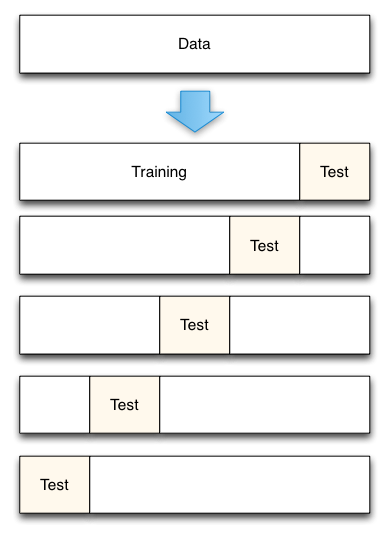






# Comparing cross-validation to train/test split

Advantages of cross-validation:

    More accurate estimate of out-of-sample accuracy
    More "efficient" use of data
        This is because every observation is used for both training and testing

Advantages of train/test split:

    Runs K times faster than K-fold cross-validation
        This is because K-fold cross-validation repeats the train/test split K-times
    Simpler to examine the detailed results of the testing process

# Cross-validation recommendations

    K can be any number, but K=10 is generally recommended
        This has been shown experimentally to produce the best out-of-sample estimate
    For classification problems, stratified sampling is recommended for creating the folds
        Each response class should be represented with equal proportions in each of the K folds
            If dataset has 2 response classes
                Spam/Ham
                20% observation = ham
                Each cross-validation fold should consist of exactly 20% ham
        scikit-learn's cross_val_score function does this by default

# Feature engineering and selection within cross-validation iterations

    Normally, feature engineering and selection occurs before cross-validation
    Instead, perform all feature engineering and selection within each cross-validation iteration
    More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data
      


## Step 1: Cross-Validation

In [ ]:
cross_validation_design = KFold(n_splits=5,
                                shuffle=True,
                                random_state=77)

cross_validation_design

# Train Catboost / Xgboost / Lgbm
## Define Baseline XGBR 

In [ ]:
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.preprocessing import PolynomialFeatures
XGBR = XGBRegressor(**xgb_params,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    tree_method='gpu_hist',
                    gpu_id=0, 
                    predictor="gpu_predictor"
                   )


# Compose num+cat : ColumnTransformer
## Multiple  preprocess + Features engnieer + Features Selections 

In [ ]:
drop_colonnes=[]
passthrough_colonnes=[]
# encode + featres engineers 
fill_missing_then_OrdinalEncoder = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value='manquante',add_indicator=True),
    OrdinalEncoder(),
    SparseInteractions(degree=2)
)
# Polynominal features + 
fill_missing_then_StandardScalerPolynomialFeatures = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
     PolynomialFeatures(degree=2),StandardScaler()
)
# Complete pipe 
data_preprocessOrdinalEncoderSparseStandardScalerPolynomial = make_column_transformer(
    ( fill_missing_then_OrdinalEncoder , cat_columns),
    ( fill_missing_then_StandardScaler, num_columns),
    ( 'drop' , drop_colonnes),
    ( 'passthrough' , passthrough_colonnes)
)
# Standar preprocess pipes 
data_preprocessOrdinalEncoder = make_column_transformer(
    ( fill_missing_then_OrdinalEncoder , cat_columns),
    ( fill_missing_then_StandardScaler, num_columns),
    ( 'drop' , drop_colonnes),
    ( 'passthrough' , passthrough_colonnes)
)
data_preprocessone_hot_encoder = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_StandardScaler, num_columns),
    ( 'drop' , drop_colonnes),
    ( 'passthrough' , passthrough_colonnes)
)


# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
pipepolyOrdiSparseStandarPolywithoutreduction = Pipeline([
        ('scaler+polyfornum+sparseforcat', data_preprocessOrdinalEncoderSparseStandardScalerPolynomial),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])


# ADD poly num features : 0.6949615269482926/Public Score :0.72104
data_preprocessoneOnehotPolynomialFeatures = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_StandardScalerPolynomialFeatures, num_columns)
)
# Pipe ONE with PolynomialFeatures: 0.6949615269482926 /Public Score :0.72104
pipeONEPoly = Pipeline([
        ('scaler+ONE+poly', data_preprocessoneOnehotPolynomialFeatures),
        ('classifier', XGBR)])


#  Pipe Ordinal encoder + standar/poly for num
#  0.6948632925742044/Public score : 0.72138
pipepolyordi = Pipeline([
        ('scaler+ordi+poly', data_preprocessOrdinalEncoderPolynomialFeatures),
        ('classifier', XGBR)])

# Pipe : poly for num +ORDINAL sparse for cat and union:Reduce f_regression + interactions
#0.7011630368570897 /Public score : 0.72686
pipepolyOrdiSparseStandarPolyf_regression = Pipeline([
        ('scaler+polyfornum+sparseforcat', data_preprocessOrdinalEncoderSparseStandardScalerPolynomial),
         ('dim_red', SelectKBest(f_regression, k=20)),
         ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])


# 21Pipe add sparse interaction after features union 
#+reduction f_regression without interactions between features
# 0.7202125250928905/Public Score:0.73536
pipepolyInteractionf_regression21 = Pipeline([
        ('scaler+ONE+poly', data_preprocessoneOnehotPolynomialFeatures),
         ('dim_red', SelectKBest(f_regression, k=20)),
         #('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])


# Pipe add sparse interaction after features union +reduction f_regression
# 0.7083904092283486/ Public Score 0.73656
pipepolyInteractionf_regression = Pipeline([
        ('scaler+ONE+poly', data_preprocessoneOnehotPolynomialFeatures),
         ('dim_red', SelectKBest(f_regression, k=20)),
         ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])


# pipe OHE  with redcution f_classif : 0.7316258211241139 /Public score :0.74741
pipeONEPolyInteractionreduceclassif = Pipeline([
        ('scaler+ONE+poly', data_preprocessoneOnehotPolynomialFeatures),
         ('dim_red', SelectKBest(f_classif, k=20)),
         ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])

# PCA 2 without interactions :
# 0.7416545727730322 /Public Score : 0.74838
pipepolypca2 = Pipeline([
        ('scaler+ordisparse+poly', data_preprocessOrdinalEncoderSparseStandardScalerPolynomial),
        ('reducer', PCA(n_components=0.8)),
        #('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])

# Pipe With PCA 
#0.7396454948292566 /Public Score 0.74868
pipepolypca = Pipeline([
        ('scaler+ordisparse+poly', data_preprocessOrdinalEncoderSparseStandardScalerPolynomial),
        ('reducer', PCA(n_components=0.8)),
        ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])

# New pipe to try :
pipepolyInteractionmutual_info_classif = Pipeline([
        ('scaler+ONE+poly', data_preprocessoneOnehotPolynomialFeatures),
         ('dim_red', SelectKBest(mutual_info_regression, k=20)),
         ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])

In [ ]:
fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_one_hot_encoder1 = make_pipeline(
    SimpleImputer(strategy='most_frequent', add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_one_hot_LabelEncoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    LabelEncoder()
)
fill_missing_then_OrdinalEncoder = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value='manquante',add_indicator=True),
    OrdinalEncoder()
)
fill_missing_then_StandardScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    StandardScaler()
)
fill_missing_then_StandardScalerPolynomialFeatures = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
     PolynomialFeatures(degree=2),StandardScaler()
)
fill_missing_then_RobustScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    RobustScaler()
)
fill_missing_then_MinMaxScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    MinMaxScaler()
)
fill_missing_then_Outlier_MinMax = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    MinMaxScaler()
) 
fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_one_hot_encoder1 = make_pipeline(
    SimpleImputer(strategy='most_frequent', add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_one_hot_LabelEncoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    LabelEncoder()
)
fill_missing_then_OrdinalEncoder = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value='manquante',add_indicator=True),
    OrdinalEncoder()
)
drop_colonnes=[]
passthrough_colonnes=[]

# encode + featres engineers 
fill_missing_then_OrdinalEncoderSparse = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value='manquante',add_indicator=True),
    OrdinalEncoder(),
    SparseInteractions(degree=2)
)

# Polynominal Robust + Robust
fill_missing_then_RobustScalerPolynomialFeatures =make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
     PolynomialFeatures(degree=2),RobustScaler()
)

# Polynominal features + Standar
fill_missing_then_StandardScalerPolynomialFeatures = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
     PolynomialFeatures(degree=2),StandardScaler()
)

# Complete pipe Standar 
data_preprocessOrdinalEncoderSparseStandardScalerPolynomial = make_column_transformer(
    ( fill_missing_then_OrdinalEncoderSparse , cat_columns),
    ( fill_missing_then_StandardScalerPolynomialFeatures, num_columns),
    ( 'drop' , drop_colonnes),
    ( 'passthrough' , passthrough_colonnes)
)

# Complete pipe Robust 
data_preprocessOrdinalEncoderSparseRobustscalerPolynomial = make_column_transformer(
    ( fill_missing_then_OrdinalEncoderSparse , cat_columns),
    ( fill_missing_then_RobustScalerPolynomialFeatures, num_columns),
    ( 'drop' , drop_colonnes),
    ( 'passthrough' , passthrough_colonnes)
)
# Complete pipe 
data_preprocessOrdinalEncoderSparseStandardScalerPolynomial = make_column_transformer(
    ( fill_missing_then_OrdinalEncoderSparse , cat_columns),
    ( fill_missing_then_StandardScaler, num_columns),
    ( 'drop' , drop_colonnes),
    ( 'passthrough' , passthrough_colonnes)
)
# Standar preprocess pipes 
data_preprocessOrdinalEncoder = make_column_transformer(
    ( fill_missing_then_OrdinalEncoder , cat_columns),
    ( fill_missing_then_StandardScaler, num_columns),
    ( 'drop' , drop_colonnes),
    ( 'passthrough' , passthrough_colonnes)
)
data_preprocessone_hot_encoder = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_StandardScaler, num_columns),
    ( 'drop' , drop_colonnes),
    ( 'passthrough' , passthrough_colonnes)
)




data_preprocessOrdinalEncoderPolynomialFeatures = make_column_transformer(
    ( fill_missing_then_OrdinalEncoder , cat_columns),
    ( fill_missing_then_StandardScalerPolynomialFeatures, num_columns)
)
data_preprocessoneOnehotPolynomialFeatures = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_StandardScalerPolynomialFeatures, num_columns)
)

# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
FirstpipepolyOrdiSparseStandarPolywithoutreduction = Pipeline([
        ('scaler+polyfornum+sparseforcat', data_preprocessOrdinalEncoderSparseStandardScalerPolynomial),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])
# to try :
SecondpipepolyOrdiSparseStandarPolywithoutreduction = Pipeline([
        ('scaler+polyfornum+sparseforcat', data_preprocessOrdinalEncoderSparseRobustscalerPolynomial),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])

# ADD poly num features : 0.6949615269482926/Public Score :0.72104
data_preprocessoneOnehotPolynomialFeatures = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_StandardScalerPolynomialFeatures, num_columns)
)
# Pipe ONE with PolynomialFeatures: 0.6949615269482926 /Public Score :0.72104
pipeONEPoly = Pipeline([
        ('scaler+ONE+poly', data_preprocessoneOnehotPolynomialFeatures),
        ('classifier', XGBR)])


#  Pipe Ordinal encoder + standar/poly for num
#  0.6948632925742044/Public score : 0.72138
pipepolyordi = Pipeline([
        ('scaler+ordi+poly', data_preprocessOrdinalEncoderPolynomialFeatures),
        ('classifier', XGBR)])


In [ ]:
rmse1 =cross_val_score(SecondpipepolyOrdiSparseStandarPolywithoutreduction, X[0:300], y[0:300], cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
print()

In [ ]:

rmse1 =cross_val_score(FirstpipepolyOrdiSparseStandarPolywithoutreduction, X1, y1, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
print()

# Tuning model with Optuna
## Using Optuna:

Steps-

    Define objective function to be optimized.Here run.
    Suggest hyperparameter values using trial object.
    Create a study object and invoke the optimize method over 100 trials.


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 1000, 5000)
    max_depth = trial.suggest_int("max_depth", 1, 10)
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-1, log=True)
    gamma = trial.suggest_float("gamma", 0.1, 1.0, step=0.1)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 7, step=2)
    subsample = trial.suggest_float("subsample", 0.5, 1.0, step=0.1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0, step=0.1)
    reg_alpha = trial.suggest_float("reg_alpha", 0., 1.0, step=0.1)
    reg_lambda = trial.suggest_float("reg_lambda", 0., 1.0, step=0.1)
    
    
    model = XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        gamma=gamma,
        min_child_weight=min_child_weight,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        n_jobs=-1, 
        tree_method='gpu_hist', 
        gpu_id=0
    )
    
    model.fit(X_train, y_train)
    
    y_hat = model.predict(X_valid)
    
    return mean_squared_error(y_valid, y_hat, squared=False)


study.optimize(objective, n_trials=300)
study = optuna.create_study(direction='minimize')

    {'n_estimators': 2694,
     'max_depth': 3,
     'learning_rate': 0.07201051864225298,
     'gamma': 0.5,
     'min_child_weight': 3,
     'subsample': 0.8,
     'colsample_bytree': 0.5,
     'reg_alpha': 0.30000000000000004,
     'reg_lambda': 0.30000000000000004}

     Number of finished trials: 100
    Best trial:
    Value: 0.7174799683646991
    Params: 
        learning_rate: 0.07977009001145592
        reg_lambda: 0.1555231584050028
        reg_alpha: 34.656377999143324
        subsample: 0.9236727428353445
        colsample_bytree: 0.12271405698528293
        max_depth: 2

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("Value: {}".format(trial.value))

print("Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
 study.best_params

In [ ]:

best_params = study.best_params
xgb_reg_final = XGBRegressor(tree_method='gpu_hist', 
                                 gpu_id=0, 
                                 **best_params)

# Tuning with GridSearch 

In [ ]:
from xgboost import XGBRegressor
XGBR = XGBRegressor()
XGBR_MODEL = {}
# Définir la pipeline
XGBR_MODEL['pipeline'] = Pipeline([
                                  ('data_process', data_preprocess),
                                  ('XGBR', XGBR)
                                  ])

# Définir la grille
XGBR_MODEL['hyperparams'] = {}
XGBR_MODEL['hyperparams']['XGBR__n_estimators'] = [100,200,2694,4575,5000,9489,80000]
#XGBR_MODEL['hyperparams']['XGBR__colsample_bytree'] = [0.5,0.7, 0.8,0.17]
#XGBR_MODEL['hyperparams']['XGBR__max_depth'] = [5,7,15,2,3]
#XGBR_MODEL['hyperparams']['XGBR__reg_alpha'] = [1.1, 1.2,1.5,0.3,40.12 ]
#XGBR_MODEL['hyperparams']['XGBR__reg_lambda'] = [1.1, 1.2, 1.3,38,0.3,67.79,]
#XGBR_MODEL['hyperparams']['XGBR__subsample'] = [0.7, 0.8, 0.9,0.955]
XGBR_MODEL['hyperparams']['XGBR__gamma '] = [1,0.3,0.5]
XGBR_MODEL['hyperparams']['XGBR__learning_rate'] = [ 0.039,0.05,0.072,0.17]
XGBR_MODEL['hyperparams']['XGBR__min_child_weight'] = [3,155]
XGBR_MODEL['hyperparams']['XGBR__booster '] = ['gbtree']
# Effectuer la GridSearch
XGBR_MODEL['gridsearch'] = GridSearchCV(
    estimator=XGBR_MODEL['pipeline'],
    param_grid=XGBR_MODEL['hyperparams'],
    cv=cross_validation_design,
    scoring='neg_root_mean_squared_error'
    )
#Define SVR classifier
XGBR_MODEL['gridsearch'].fit(X_train, y_train)
XGBR_accuracy = XGBR_MODEL['gridsearch'].score(X_test, y_test)
print('SXGBR Accuracy : ', XGBR_accuracy)

In [ ]:
XGBR_MODEL['gridsearch'].cv_results_

In [ ]:
XGBR_MODEL['gridsearch'].best_params_

# Try Crossvalidation for prediction 

In [ ]:
def train(model):
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', model)
                     ])

    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    ypred = 0
    total_loss = 0
    for train_indx, test_indx in cv.split(X):
        X_train, X_val = X.iloc[train_indx], X.iloc[test_indx]
        y_train, y_val = y.iloc[train_indx], y.iloc[test_indx]
        clf.fit(X_train, y_train)
        
        yhat = clf.predict(X_val)
        score = mean_squared_error(yhat, y_val, squared=False)
        print(f"Loss:{score}")
        ypred += clf.predict(X_test) / 10
        total_loss += score / 10
        
    print(f"Avg. Loss: {total_loss}")     
    return ypred

In [ ]:
model = XGBRegressor(n_estimators= 10000, booster='gbtree', tree_method='gpu_hist', 
                    learning_rate= 0.35, subsample= 0.926, max_depth= 2,
                    colsample_bytree = 0.84, reg_alpha = 34.9, random_state = 42,
                    reg_lambda = 35.1, n_jobs=-1)

final_prediction = train(model)

# Select Best Model and retrain on all data 

In [ ]:
data_cleaning = make_column_transformer(
    ( OneHotEncoder(), colonnes_catégoriques ),
    ( fill_missing_then_one_hot_encoder , colonnes_catégoriques_avec_valeurs_manquantes),
    ( SimpleImputer(strategy='mean'), colonnes_numériques_avec_valeurs_manquantes),
    ( CountVectorizer(), 'Name'),
    ( extraire_lettre_cabine, 'Cabin'),
    ( 'drop' , drop_colonnes),
    ( 'passthrough' , passthrough_colonnes)
)

model_final = Pipeline([('data_cleaning', data_cleaning),
                        ('rf', RandomForest(random_state=7,
                                            max_depth=10,
                                            max_features=0.25,
                                            n_estimators=150))
                        ])


# on fit la meilleur pipe sur toute nos données de train
model_final.fit(X, Y)

#  Submit to the competition
We'll begin by using the trained model to generate predictions, which we'll save to a CSV file.


In [ ]:
pipepolypca.fit(X, y)
preds_valid = pipepolypca.predict(X_test)
print(mean_squared_error(y_test, preds_valid, squared=False))
test_final= test.drop(['id'], axis=1)
# Use the model to generate predictions
predictions = pipepolypca.predict(test_final)
# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test.id,'target': predictions})
output.to_csv('6submissionpipepolypca.csv', index=False)

# References : 
# Pipe and code to follow :
### Xgboost :  
https://www.kaggle.com/tilii7/bias-correction-xgboost

https://www.kaggle.com/ranjeetshrivastav/optuna-voting-xgb-lgb

https://www.kaggle.com/haotianhang/30-days-of-ml-xgboost-optuna-best-score-0-71949

https://www.kaggle.com/mohammadghanaym/eda-xgboost-hyperparameters-tuning

https://www.kaggle.com/maximkazantsev/30dml-eda-xgboost

https://www.kaggle.com/andersvp/xgboost-kfold-and-hyperopt-tuning

https://www.kaggle.com/mhmdsyed/30-day-ml-starter-eda-simple-xgboost-model

https://www.kaggle.com/miguelquiceno/30-days-xgboost-optuna

https://www.kaggle.com/pranav2109/xgbpipeline

https://www.kaggle.com/afifnugraha/kaggle-30-days-ml-competition-by-afif

https://www.kaggle.com/kavehshahhosseini/30-days-ml-xgboost-hyperparameter-optimization

https://www.kaggle.com/kavehshahhosseini/30-days-ml-xgboost-hyperparameter-optimization

https://www.kaggle.com/mrkyawswarthant/simple-xgboost-with-gpu

https://www.kaggle.com/miguelquiceno/30-days-kfold-xgboost

https://www.kaggle.com/linzino/use-easily-with-xgboost-from-getting-started
https://www.kaggle.com/yogidsba/30days-of-ml-xgboost

https://www.kaggle.com/boneacrabonjac/30-days-ml-xgbr-with-auto-eda

https://www.kaggle.com/rishirajacharya/30-days-xgboost-with-5-folds-eda-gpu

https://www.kaggle.com/mohammadghanaym/30-ml-competition-xgboost

https://www.kaggle.com/lucamassaron/tutorial-bayesian-optimization-with-xgboost

https://www.kaggle.com/lucamassaron/tutorial-bayesian-optimization-with-catboost

https://www.kaggle.com/lucamassaron/tutorial-bayesian-optimization-with-lightgbm

https://www.kaggle.com/medicinewave/1stday-easy-lgbm-tuned

https://www.kaggle.com/pranav2109/featureengineering-ensemble-xgbpipeline

https://www.kaggle.com/heyrobin/30-days-ml-with-xgbr

https://www.kaggle.com/mohammadghanaym/eda-xgboost-hyperparameters-tuning

https://www.kaggle.com/hamzaghanmi/30-days-of-ml-competition-step-by-step

### LGBM
https://www.kaggle.com/yaeulrichgaba/trying-lgbm-simple-30-days-ml-competition

https://www.kaggle.com/seraphwedd18/lightgbm-with-feature-engineering

https://www.kaggle.com/jahaziel/lgb-optuna

https://www.kaggle.com/kokitanisaka/lightgbm-starter-30-days-of-ml

https://www.kaggle.com/lucamassaron/tutorial-bayesian-optimization-with-xgboost

# cat boost :
https://www.kaggle.com/maximkazantsev/30dml-eda-simple-catboost

https://www.kaggle.com/aymanlafaz/30dml-catboost-optuna-optim

# Features Engineer :
https://www.kaggle.com/abhishek/competition-part-2-feature-engineering

https://www.kaggle.com/hongpeiyi/tuning-xgboost-with-optuna

# Deep Learning : 
https://www.kaggle.com/yassinemesbahi/eda-fe-artificial-neural-network-model

https://www.kaggle.com/sgedela/30-days-of-ml-competition

https://www.kaggle.com/tsubajiro/prediction-with-neural-network

https://www.kaggle.com/mtinti/keras-starter-with-bagging-1111-84364

# AutoML
# Ensemble : 

https://www.kaggle.com/noulan/standing-on-the-shoulders-of-giants-ensemble


https://www.kaggle.com/kokitanisaka/a-way-of-finding-optimum-blending-weight


https://www.kaggle.com/ranjeetshrivastav/optuna-voting-xgb-lgb


https://www.kaggle.com/dwin183287/30-days-of-ml-eda


https://www.kaggle.com/vipin20/getting-start-30-days-ml

Mutal information is used for non linear relation :

https://www.kaggle.com/pranav2109/featureengineering-ensemble-xgbpipeline

https://www.kaggle.com/sgedela/30-days-of-ml-competition    
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
# Run on gpu using cuml: 
https://www.kaggle.com/jonaspalucibarbosa/30days-random-forest-on-gpu-rapids